### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

### Load the data

In [2]:
raw_data = pd.read_csv('../dataset/Example.csv')

In [3]:
raw_data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [4]:
data = raw_data.copy()

### Plot the data

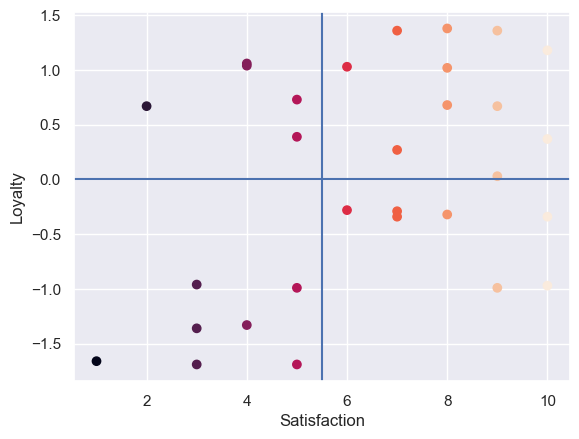

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=data['Satisfaction'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.axvline(5.5)
plt.axhline(0)
plt.show()

### Cluster

In [6]:
kmeans = KMeans(2, n_init=10, )
kmeans.fit(data)

KMeans(n_clusters=2)

In [7]:
cluster = data.copy()
cluster['cluster_pred'] = kmeans.fit_predict(data)

In [8]:
cluster

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


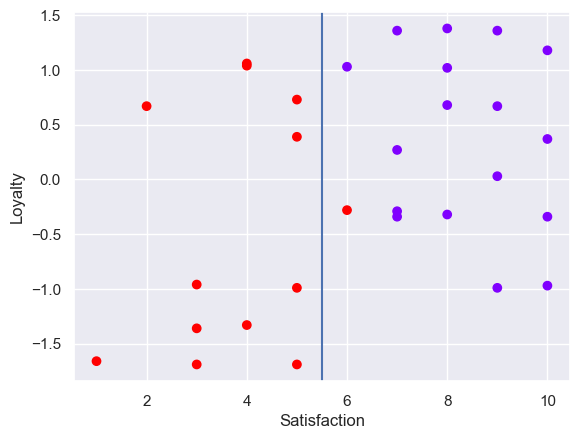

In [9]:
plt.scatter(cluster['Satisfaction'], cluster['Loyalty'], c=cluster['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.axvline(5.5)
plt.show()

### Standardize

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


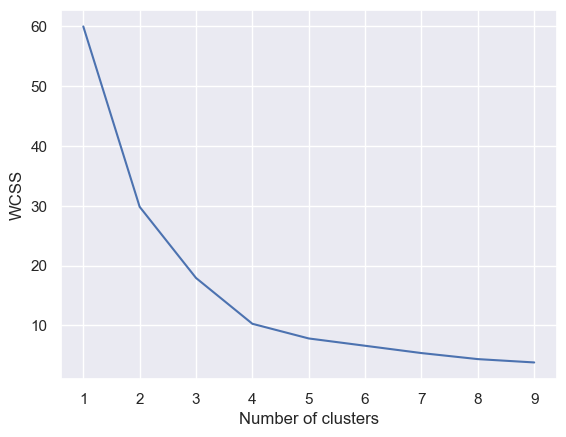

In [13]:
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(4, n_init=10, )
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [15]:
cluster_new = data.copy()
cluster_new['cluster_pred'] = kmeans.fit_predict(scaled_data)

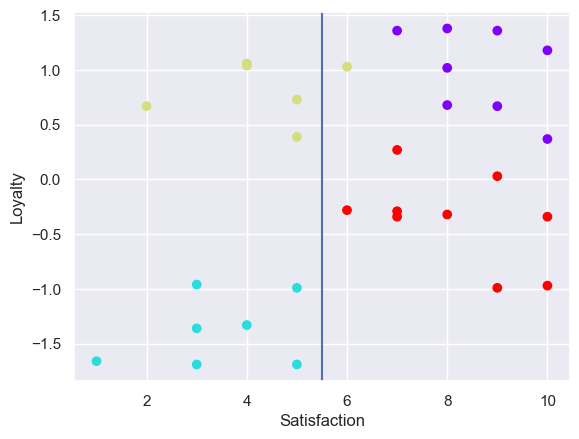

In [16]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.axvline(5.5)
plt.show()